For our final project, we decided to simulate the eccentricity time evoltion of Neptune, Pluto and Orcus using the REBOUND python code. Pluto and Orcus in particular are trans-Neptunian objects (known as Plutinos) that are in a 2:3 orbital resonance with Neptune around the Sun. We aimed collect simulation data using rebound and plot the eccentricity of all three bodies over a maximum time scale. With this we hoped to conclude the stability of the the orbits over a significant time period and see if they fall out of resonance.

In [50]:
import rebound 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

sim = rebound.Simulation()
sim.units = ('AU', 'yr', 'Msun')

labels = ['Sun', 'Neptune', 'Pluto', 'Orcus']
sim.add(labels)

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')
Searching NASA Horizons for 'Pluto'... 
Found: Pluto Barycenter (9) (chosen from query 'Pluto')
Searching NASA Horizons for 'Orcus'... 
Found: 90482 Orcus (2004 DW) 


/home/sudat/.local/lib/python3.8/site-packages/rebound/horizons.py:160: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


In [44]:
os = sim.calculate_orbits()
print('n_i (in rad/years) = %6.3f , %6.3f , %6.3f' % (os[0].n, os[1].n, os[2].n))
print("P_i (in years)     = %6.3f, %6.3f, %6.3f" % (os[0].P,os[1].P,os[2].P))

n_i (in rad/years) =  0.038 ,  0.025 ,  0.026
P_i (in years)     = 166.833, 250.050, 244.477


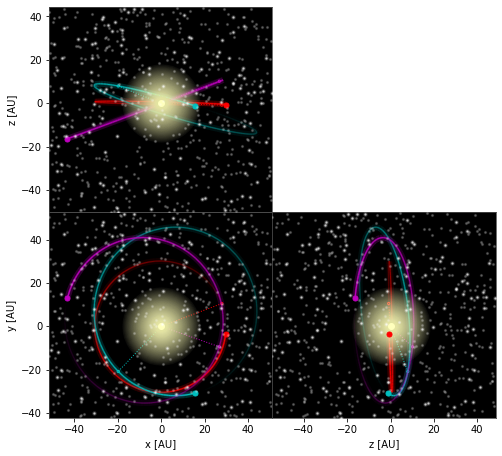

In [45]:
sim.move_to_com()
fig =  rebound.OrbitPlot(sim, slices=1, unitlabel='[AU]', fancy=True, color=True, periastron=True)

In [4]:
sim.integrator = "whfast"
sim.dt = 0.1 * os[0].P
Nout = 100000 # number of points to display
tmax = 1.0e5 # number of years the simulation runs
Nplanets = 3

x = np.zeros((Nplanets,Nout))
ecc = np.zeros((Nplanets,Nout))
longitude = np.zeros((Nplanets,Nout))
varpi = np.zeros((Nplanets,Nout))

times = np.linspace(0.,tmax,Nout)
ps = sim.particles

for i,time in enumerate(times):
    sim.integrate(time)
    os = sim.calculate_orbits()
    for j in range(Nplanets):
        x[j][i] = ps[j+1].x 
        ecc[j][i] = os[j].e
        longitude[j][i] = os[j].l
        varpi[j][i] = os[j].Omega + os[j].omega

Note that this integration code above was re-done from a staring point of 100,000 years to 100,000,000 years to observe the stability (or instability) of the eccentrities of each planet/plutino.

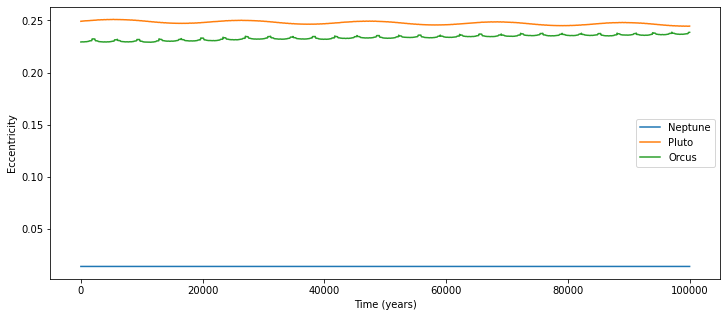

In [5]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,ecc[0],label=labels[1])
plt.plot(times,ecc[1],label=labels[2])
plt.plot(times,ecc[2],label=labels[3])
ax.set_xlabel("Time (years)")
ax.set_ylabel("Eccentricity")
plt.legend();

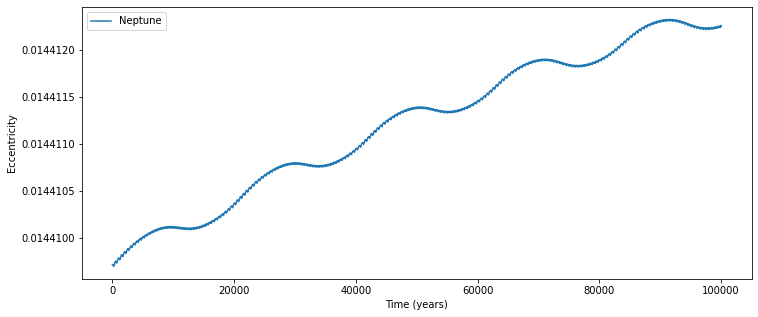

In [6]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,ecc[0],label=labels[1])
ax.set_xlabel("Time (years)")
ax.set_ylabel("Eccentricity")
plt.legend();

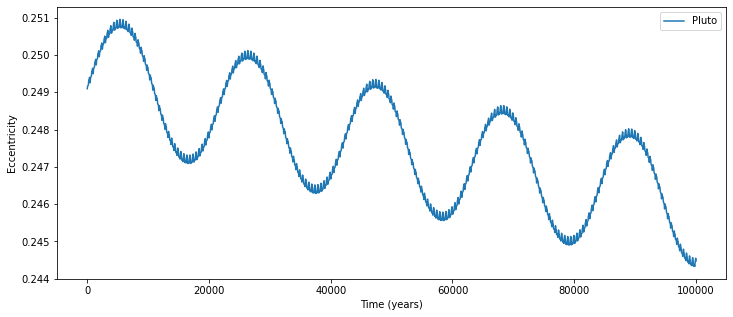

In [7]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,ecc[1],label=labels[2])
ax.set_xlabel("Time (years)")
ax.set_ylabel("Eccentricity")
plt.legend();

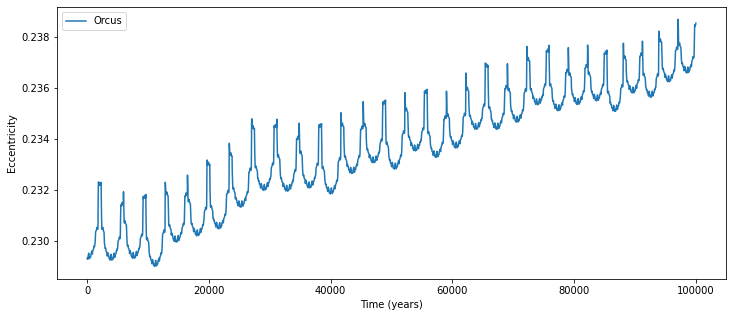

In [8]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,ecc[2],label=labels[3])
ax.set_xlabel("Time (years)")
ax.set_ylabel("Eccentricity")
plt.legend();

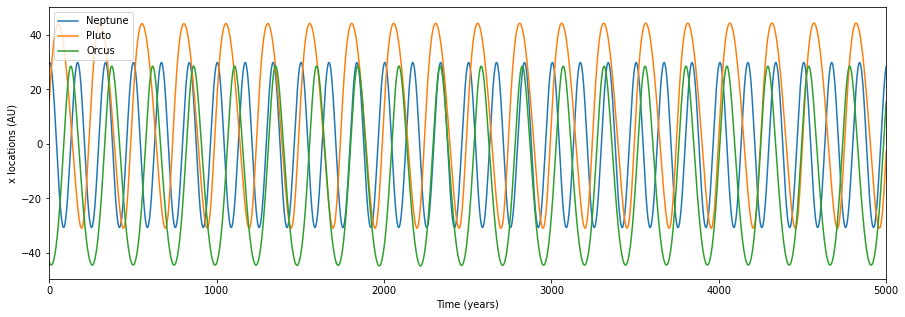

In [9]:
from matplotlib import axes
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
plt.plot(times,x[0],label=labels[1])
plt.plot(times,x[1],label=labels[2])
plt.plot(times,x[2],label = labels[3])
ax.set_xlim([0,5000])
ax.set_xlabel("Time (years)")
ax.set_ylabel("x locations (AU)")
ax.tick_params()
plt.legend();

Integration re-done for 1,000,000 years

In [23]:
sim.integrator = "whfast"
sim.dt = 0.1 * os[0].P
Nout = 100000 # number of points to display
tmax = 1.0e6 # number of years the simulation runs
Nplanets = 3

x = np.zeros((Nplanets,Nout))
ecc = np.zeros((Nplanets,Nout))
longitude = np.zeros((Nplanets,Nout))
varpi = np.zeros((Nplanets,Nout))

times = np.linspace(0.,tmax,Nout)
ps = sim.particles

for i,time in enumerate(times):
    sim.integrate(time)
    os = sim.calculate_orbits()
    for j in range(Nplanets):
        x[j][i] = ps[j+1].x 
        ecc[j][i] = os[j].e
        longitude[j][i] = os[j].l
        varpi[j][i] = os[j].Omega + os[j].omega

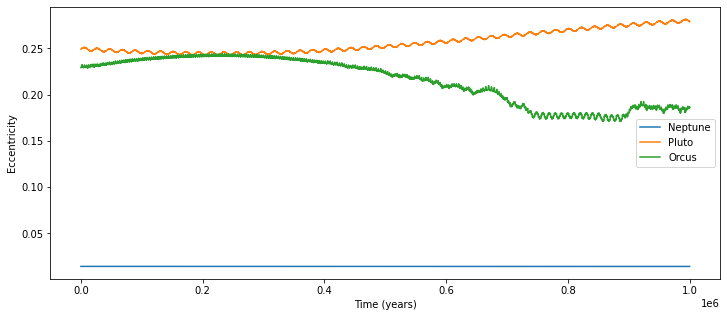

In [24]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,ecc[0],label=labels[1])
plt.plot(times,ecc[1],label=labels[2])
plt.plot(times,ecc[2],label=labels[3])
ax.set_xlabel("Time (years)")
ax.set_ylabel("Eccentricity")
plt.legend();

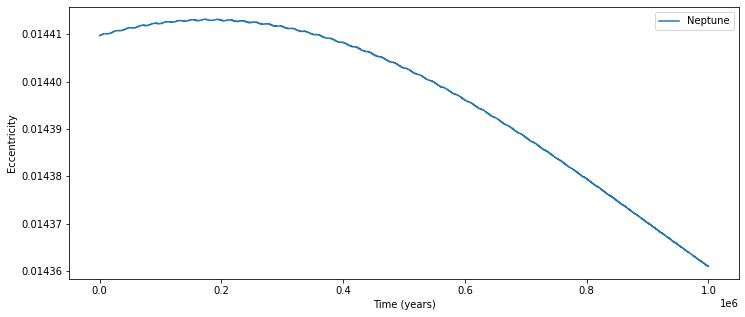

In [25]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,ecc[0],label=labels[1])
ax.set_xlabel("Time (years)")
ax.set_ylabel("Eccentricity")
plt.legend();

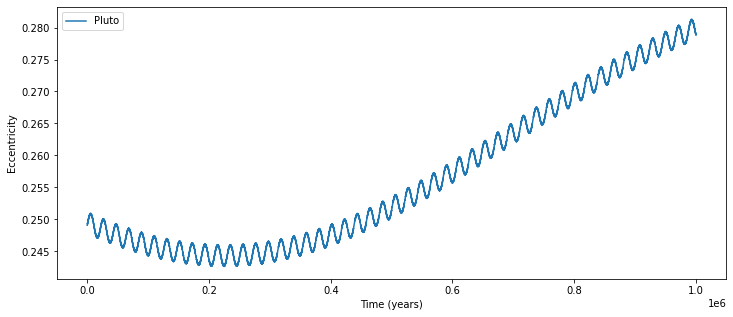

In [26]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,ecc[1],label=labels[2])
ax.set_xlabel("Time (years)")
ax.set_ylabel("Eccentricity")
plt.legend();

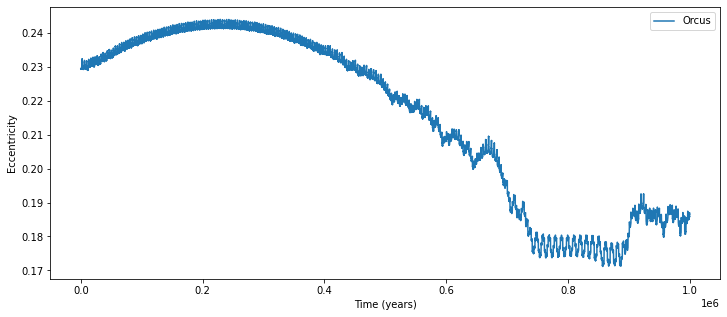

In [27]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,ecc[2],label=labels[3])
ax.set_xlabel("Time (years)")
ax.set_ylabel("Eccentricity")
plt.legend();

Integration re-done for 10,000,000 years

In [41]:
sim.integrator = "whfast"
sim.dt = 0.1 * os[0].P
Nout = 100000 # number of points to display
tmax = 1.0e7 # number of years the simulation runs
Nplanets = 3

x = np.zeros((Nplanets,Nout))
ecc = np.zeros((Nplanets,Nout))
longitude = np.zeros((Nplanets,Nout))
varpi = np.zeros((Nplanets,Nout))

times = np.linspace(0.,tmax,Nout)
ps = sim.particles

for i,time in enumerate(times):
    sim.integrate(time)
    os = sim.calculate_orbits()
    for j in range(Nplanets):
        x[j][i] = ps[j+1].x 
        ecc[j][i] = os[j].e
        longitude[j][i] = os[j].l
        varpi[j][i] = os[j].Omega + os[j].omega

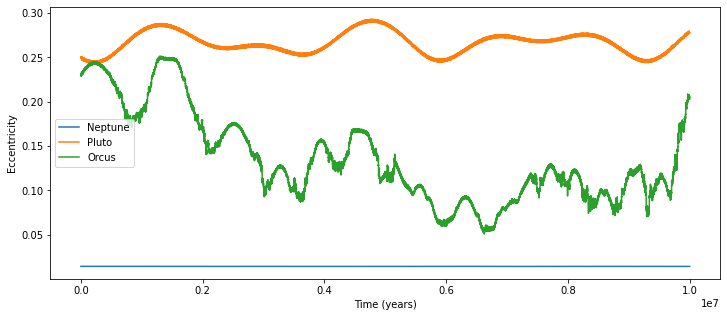

In [32]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,ecc[0],label=labels[1])
plt.plot(times,ecc[1],label=labels[2])
plt.plot(times,ecc[2],label=labels[3])
ax.set_xlabel("Time (years)")
ax.set_ylabel("Eccentricity")
plt.legend();

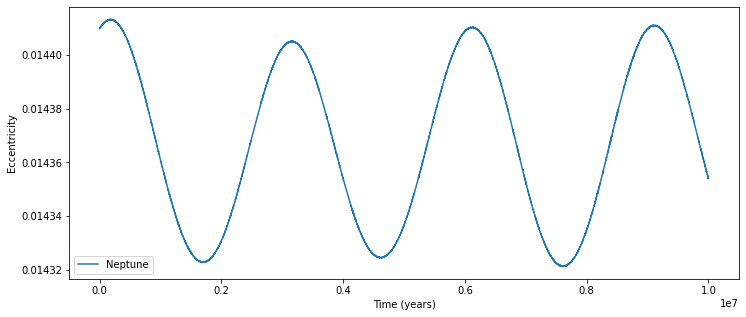

In [33]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,ecc[0],label=labels[1])
ax.set_xlabel("Time (years)")
ax.set_ylabel("Eccentricity")
plt.legend();

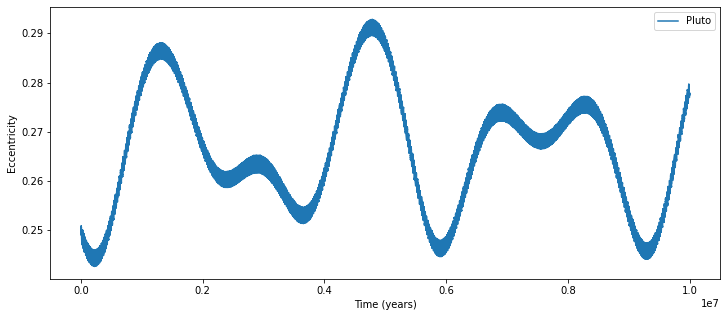

In [34]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,ecc[1],label=labels[2])
ax.set_xlabel("Time (years)")
ax.set_ylabel("Eccentricity")
plt.legend();

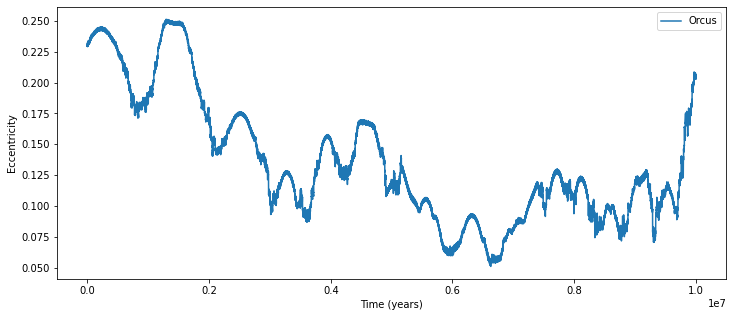

In [35]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,ecc[2],label=labels[3])
ax.set_xlabel("Time (years)")
ax.set_ylabel("Eccentricity")
plt.legend();

Integration re-done for 100,000,000 years

In [51]:
sim.integrator = "whfast"
sim.dt = 0.1 * os[0].P
Nout = 100000 # number of points to display
tmax = 1.0e8 # number of years the simulation runs
Nplanets = 3

x = np.zeros((Nplanets,Nout))
ecc = np.zeros((Nplanets,Nout))
longitude = np.zeros((Nplanets,Nout))
varpi = np.zeros((Nplanets,Nout))

times = np.linspace(0.,tmax,Nout)
ps = sim.particles

for i,time in enumerate(times):
    sim.integrate(time)
    os = sim.calculate_orbits()
    for j in range(Nplanets):
        x[j][i] = ps[j+1].x 
        ecc[j][i] = os[j].e
        longitude[j][i] = os[j].l
        varpi[j][i] = os[j].Omega + os[j].omega

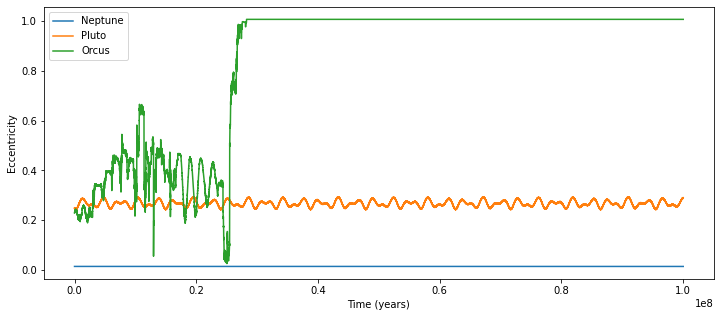

In [52]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,ecc[0],label=labels[1])
plt.plot(times,ecc[1],label=labels[2])
plt.plot(times,ecc[2],label=labels[3])
ax.set_xlabel("Time (years)")
ax.set_ylabel("Eccentricity")
plt.legend();

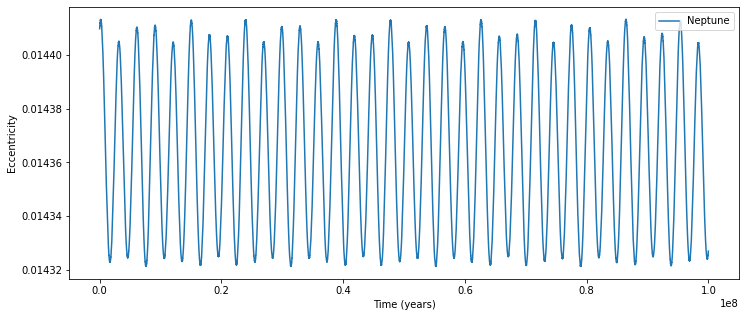

In [53]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,ecc[0],label=labels[1])
ax.set_xlabel("Time (years)")
ax.set_ylabel("Eccentricity")
plt.legend();

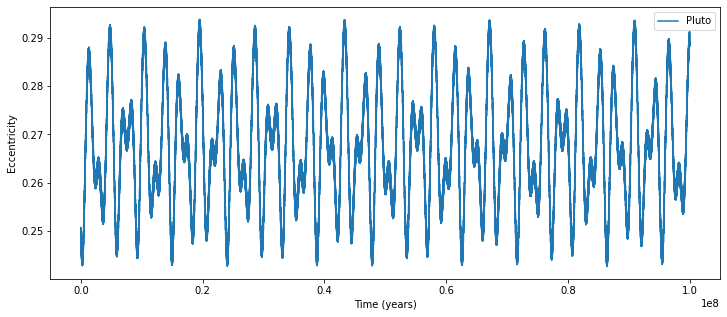

In [55]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,ecc[1],label=labels[2])
ax.set_xlabel("Time (years)")
ax.set_ylabel("Eccentricity")
plt.legend();

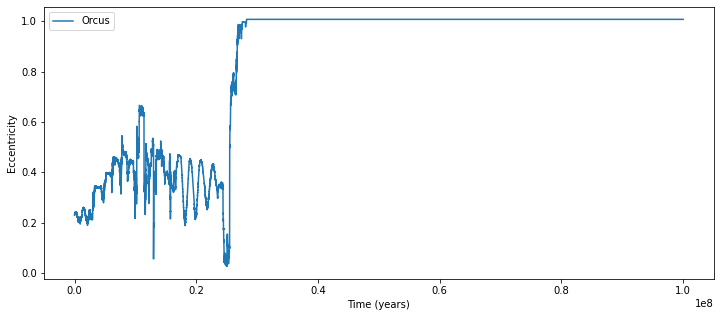

In [56]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
plt.plot(times,ecc[2],label=labels[3])
ax.set_xlabel("Time (years)")
ax.set_ylabel("Eccentricity")
plt.legend();

The last analysis that was done was a Fast Fourier Transform (FFT). The FFT analysis was done from
60 to 500 years, and within this time span we were able to verify the orbital periodicities of Neptune, Pluto
and Orcus. This can bee seen on the plots as strong peaks at around 1.5 × 102 and 2.5 × 102 years. On top
of that, between the 60 to 500 year times span, the eccentricities between all three objects are constant and
stable. As such we can see a small peak on all there plots that represent the 2:3 resonance Neptune has with
Pluto and Orcus at around 85 years. We can also observe the 1:1 resonance between Pluto and Orcus with
a peak at around 1.2 × 102 years.

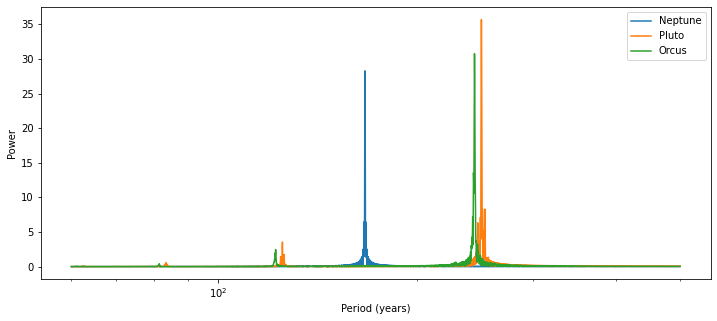

In [10]:
from scipy import signal 
Npts = 3000
logPmin = np.log10(60.) # look for periodicities with periods logarithmically spaced between 60 yrs and 500 yrs
logPmax = np.log10(5.0e2)
Ps = np.logspace(logPmin,logPmax,Npts)
ws = np.asarray([2*np.pi/P for P in Ps]) # calculate an array of corresponding angular frequencies


periodogram_1 = signal.lombscargle(times,x[0],ws)
periodogram_2 = signal.lombscargle(times, x[1], ws)
periodogram_3 = signal.lombscargle(times, x[2], ws)

fig=plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.plot(Ps, np.sqrt(4*periodogram_1/Nout), label=labels[1])
ax.plot(Ps, np.sqrt(4*periodogram_2/Nout), label=labels[2])
ax.plot(Ps, np.sqrt(4*periodogram_3/Nout), label=labels[3])

ax.set_xscale('log')
ax.set_xlabel('Period (years)')
ax.set_ylabel('Power')
ax.legend();

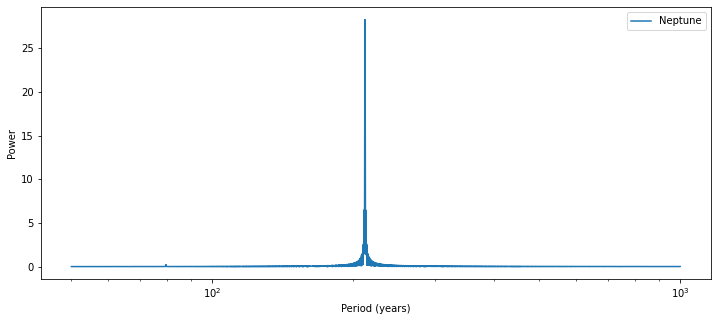

In [11]:
logPmin = np.log10(50.)
logPmax = np.log10(1.0e3)
Ps = np.logspace(logPmin,logPmax,Npts)
ws = np.asarray([2*np.pi/P for P in Ps])

fig=plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.plot(Ps, np.sqrt(4*periodogram_1/Nout), label=labels[1])

ax.set_xscale('log')
ax.set_xlabel('Period (years)')
ax.set_ylabel('Power')
ax.legend();

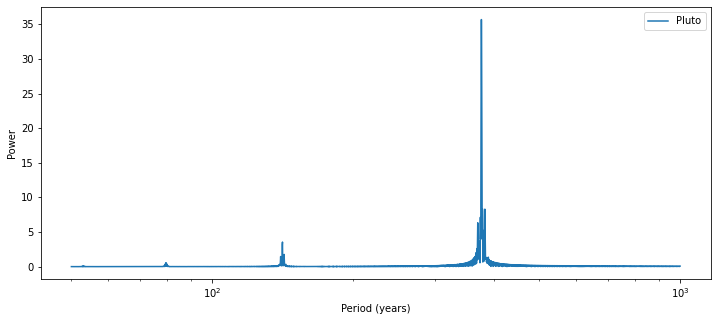

In [12]:
logPmin = np.log10(50.)
logPmax = np.log10(1.0e3)
Ps = np.logspace(logPmin,logPmax,Npts)
ws = np.asarray([2*np.pi/P for P in Ps])

fig=plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.plot(Ps, np.sqrt(4*periodogram_2/Nout), label=labels[2])

ax.set_xscale('log')
ax.set_xlabel('Period (years)')
ax.set_ylabel('Power')
ax.legend();

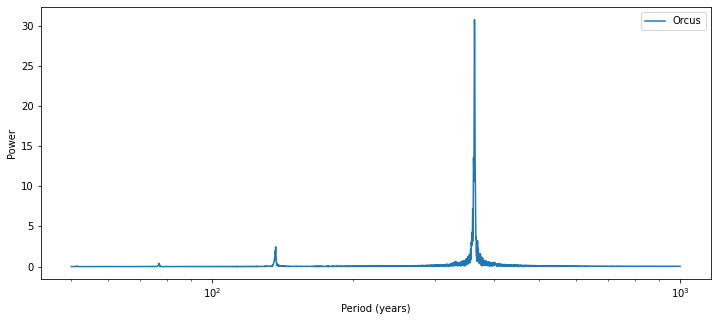

In [13]:
logPmin = np.log10(50.)
logPmax = np.log10(1.0e3)
Ps = np.logspace(logPmin,logPmax,Npts)
ws = np.asarray([2*np.pi/P for P in Ps])

fig=plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.plot(Ps, np.sqrt(4*periodogram_3/Nout), label=labels[3])

ax.set_xscale('log')
ax.set_xlabel('Period (years)')
ax.set_ylabel('Power')
ax.legend();